<a href="https://colab.research.google.com/github/shairatabassum/MachineLearning_python/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression Algorithm**

In Linear Regression, the data is predicted with a linear function which gives output continuous values. However, when the requirement is to get some probabilities instead of continuous values, a **Sigmoid Function** need to be used in the linear model. This is called **Logistic Regression**. 

**Sigmoid Function:** $ s(x) = \frac{1}{1 + e^{-x}} $

The Sigmoid Function will give output a probability between 0 and 1.

**Approximation:** $ \hat{y} = h_\theta (x) = \frac{1}{1 + e^{-wx + b}} $

**Cost Function:** Like Linear Regression, the Logistic Regression also uses **Cost Function** to define the values of weight $w$ and bias $b$. However, instead of using MSE, the Gradient Descent of Logistic Regression uses **Cross-Entropy**. 

$ J(w,b) = J(\theta) = \frac{1}{N} $$\sum^{n}_{i=1}$$ [y^i \log(h_\theta (x^i)) + (1 - y^i) \log(1 - h_\theta (x^i))] $

The goal is to minimize the error as much as possible which requires to find the minimum of this function. Thus, the derivative of the gradient is calculated in order to find the minimum of the **Cost Function**. Using these calculated derivatives or gradients, an iterative method is applied named **Gradient Descent** to get to the minimum of $J(w)$.

Using the cost function with an initialization of weight and bias, it goes towards the direction of the steepest descent. This process is done iteratively until the minimum error is reached. However, the weight and bias are updated after each iteration.

**Update Rules:** Same as Linear Regression.
* $ w = w - \alpha \times dw $
* $ b = b - \alpha \times db $
* $ \frac{dJ}{dw}\ = dw = \frac{1}{N}\ $$\sum^{n}_{i=1}$$ - 2x_i (y_i - (wx_i + b)) = \frac{1}{N}\ $$\sum^{n}_{i=1}$$ 2x_i(\hat{y} - y_i) $
* $ \frac{dJ}{db}\ = db = \frac{1}{N}\ $$\sum^{n}_{i=1}$$ - 2 (y_i - (wx_i + b)) = \frac{1}{N}\ $$\sum^{n}_{i=1}$$ 2(\hat{y} - y_i) $

Here, the $\alpha$ is called **Learning Rate** which defines how far the steps should be taken towards the direction of the steepest descent in each iteration. If the learning rate is small, it may take longer but it can finally reach to the minimum. On the otherhand, if the learning rate is big, then it might be faster but it will jump around and never find the minimum. Thus, the learning rate is an important parameter that need to be specified to achieve the goal.

**Best Fit Line in Linear Regression:**
Linear Regression is the process of finding a line that best fits the data points available on the plot, so that it can be used to predict output values for given inputs. So, a line of best fit is a straight line that represents the best approximation of a scatter plot of data points.

### **Import Dataset**

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import sklearn
import seaborn as sns

In [2]:
# load dataset
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# print data samples
print('X: ', X_train.shape)
print('Sample of X:', X_train[0])
print('y: ', y_train.shape)
print('Sample of y:', y_train[0])

X:  (455, 30)
Sample of X: [1.288e+01 1.822e+01 8.445e+01 4.931e+02 1.218e-01 1.661e-01 4.825e-02
 5.303e-02 1.709e-01 7.253e-02 4.426e-01 1.169e+00 3.176e+00 3.437e+01
 5.273e-03 2.329e-02 1.405e-02 1.244e-02 1.816e-02 3.299e-03 1.505e+01
 2.437e+01 9.931e+01 6.747e+02 1.456e-01 2.961e-01 1.246e-01 1.096e-01
 2.582e-01 8.893e-02]
y:  (455,)
Sample of y: 1


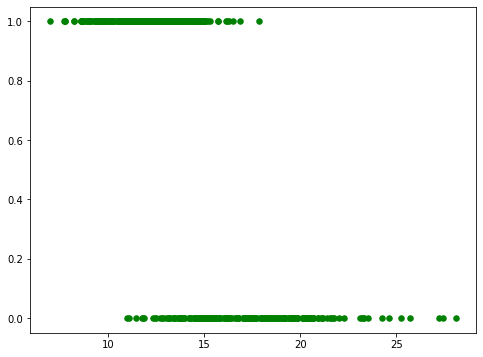

In [3]:
# plot data samples
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='g', s=30)
plt.show()

### **Logistic Regression from scratch**

In [4]:
class LogisticRegressionModel:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [5]:
# train the model
regressor = LogisticRegressionModel(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [6]:
# model accuracy
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

print('Accuracy:', round(accuracy(y_test, predictions)*100, 2), '%')

Accuracy: 92.98 %


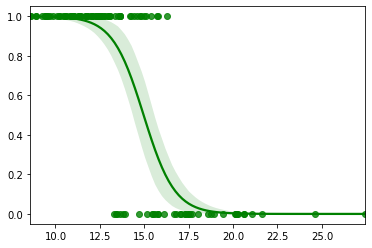

In [8]:
# best fit line visualization
sns.regplot(x=X_test[:,0], y=predictions, data=bc, logistic=True, color='g')

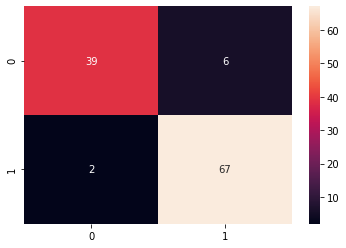

In [9]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [10]:
# classification report
print(classification_report(y, regressor.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       212
           1       0.90      0.98      0.94       357

    accuracy                           0.92       569
   macro avg       0.93      0.90      0.91       569
weighted avg       0.92      0.92      0.92       569



### **Logistic Regression using scikit-learn**

In [17]:
# train the model
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

# model accuracy
accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)
print('Accuracy:', round(accuracy*100, 2), '%.')

Accuracy: 94.74 %.


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


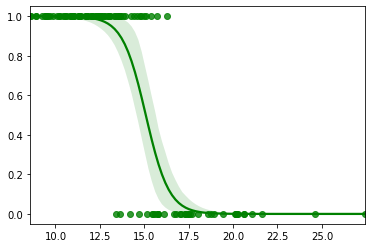

In [18]:
# best fit line visualization
sns.regplot(x=X_test[:,0], y=y_pred, data=bc, logistic=True, color='g')

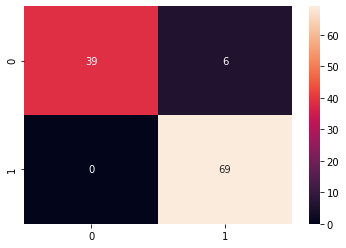

In [19]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [20]:
# classification report
print(classification_report(y, logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       212
           1       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569

